In [1]:
# Importando bibliotecas

import pandas as pd
import re
import numpy as np
import inflection
import streamlit as st
from PIL import Image
import folium
from streamlit_folium import folium_static

# configurando para mostrar todas as colunas
pd.set_option('display.max_columns', None)

# dando nome ao DataFrame

df = pd.read_csv('dataset/zomato_tratado.csv')

In [2]:
df1 = df.copy()

In [3]:
# Olhando o tamanho do DataFrame

df1.shape

(6927, 22)

In [4]:
df1.head(5)

,restaurant_id,restaurant_name,country,city,address,locality,locality_verbose,longitude,latitude,cuisines,price_type,average_cost_for_two,currency,has_table_booking,has_online_delivery,is_delivering_now,aggregate_rating,color_name,rating_color,rating_text,votes,price_in_dollar
0,6310675,Mama Lou's Italian Kitchen,Philippines,Las Piñas City,"Block 1, Lot 36, Tropical Avenue Corner Tropic...",BF International,"BF International, Las Piñas City",121.009787,14.447615,Italian,expensive,1100,Botswana Pula(P),1,0,0,4.6,darkgreen,3F7E00,Excellent,619,80.82
1,6314542,Blackbird,Philippines,Makati City,"Nielson Tower, Ayala Triangle Gardens, Salcedo...","Ayala Triangle Gardens, Salcedo Village, Makat...","Ayala Triangle Gardens, Salcedo Village, Makat...",121.024562,14.556042,European,gourmet,3100,Botswana Pula(P),0,0,0,4.7,darkgreen,3F7E00,Excellent,469,227.77
2,6301293,Banapple,Philippines,Makati City,"Ayala Triangle Gardens, Salcedo Village, Makat...","Ayala Triangle Gardens, Salcedo Village, Makat...","Ayala Triangle Gardens, Salcedo Village, Makat...",121.023171,14.556196,Filipino,expensive,800,Botswana Pula(P),0,0,0,4.4,green,5BA829,Very Good,867,58.78
3,6315689,Bad Bird,Philippines,Makati City,"Hole In The Wall, Floor 4, Century City Mall, ...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027708,14.565899,American,expensive,700,Botswana Pula(P),0,0,0,4.4,green,5BA829,Very Good,858,51.43
4,6304833,Manam,Philippines,Makati City,"Level 1, Greenbelt 2, Ayala Center, Greenbelt,...","Greenbelt 2, San Lorenzo, Makati City","Greenbelt 2, San Lorenzo, Makati City, Makati ...",121.020380,14.552351,Filipino,expensive,700,Botswana Pula(P),0,0,0,4.7,darkgreen,3F7E00,Excellent,930,51.43


# Geral

##  1. Quantos restaurantes únicos estão registrados?
## R: Estao registrados 6927 Restaurantes unicos }


In [5]:
unico = len(df1.loc[:,'restaurant_id'].unique())

unico

6927

## 2. Quantos países únicos estão registrados?

## R: 15 paises unicos estao registrado 



In [6]:
unico = (df1.loc[:,'country'].unique())

unico.shape

(15,)

## 3. Quantas cidades únicas estão registradas?
## R: Estao Registradas 125 cidades unicas




In [7]:
unico = (df1.loc[:,'city'].unique())
unico.shape

(125,)

## 4. Qual o total de avaliações feitas?

## R: O total de avaliação feita foi de 4.194.530



In [8]:
total_votes = df1['votes'].sum()
total_votes

4194530

## 5. Qual o total de tipos de culinária registrados?
## 163 Tipos de culinaria Registrados




In [9]:
unico = (df1.loc[:,'cuisines'].unique())
unico.shape

(163,)

# Pais

## 1. Qual o nome do país que possui mais cidades registradas?

## R: A India é o pais que possui mais cidads registradas


In [10]:
coluna = ['country', 'city']
df1.loc[:, coluna].groupby(['country']).agg({'city': 'nunique'}).sort_values(by='city', ascending=False).head(3).reset_index()


,country,city
0,India,49
1,United States of America,22
2,Philippines,12


## 2. Qual o nome do país que possui mais restaurantes registrados?

## A India é o pais com mais restaurante registrado


In [11]:
coluna = ['restaurant_id', 'country']
df1.loc[:, coluna].groupby( ['country'] ).agg({'restaurant_id': 'count'}).sort_values(by='restaurant_id', ascending=False).head(3).reset_index()

,country,restaurant_id
0,India,3111
1,United States of America,1374
2,England,400


## 3. Qual o nome do país que possui mais restaurantes com o nível de preço igual a 4 registrados?

## O pais com mais restaurante de nivel de preço igual a 4 é o United States of America	

In [12]:
coluna = ['restaurant_id', 'country', 'price_type']
df1.loc[df1['price_type'] == 'gourmet', coluna].groupby(['country', 'price_type']).agg( {'restaurant_id': 'count' }).sort_values(by='restaurant_id', ascending=False).head(3).reset_index()

,country,price_type,restaurant_id
0,United States of America,gourmet,415
1,South Africa,gourmet,220
2,India,gourmet,195


## 4. Qual o nome do país que possui a maior quantidade de tipos de culinária distintos?

## R: India com 77 tipos de culinaria distintos


In [13]:
#Colocando as diferentes culinárias em uma lista única para cada país
df_country_cuisines = df1.groupby('country')['cuisines'].apply(list).reset_index()

# contando o número de elementos únicos em cada lista de culinárias 
df_country_cuisines['unique_cuisines'] = df_country_cuisines['cuisines'].apply(lambda x: len(set(x)))

# Classificando o resultado em ordem decrescente de número de tipos de culinária distintos
df_country_cuisines.sort_values('unique_cuisines', ascending=False).head(5)

,country,cuisines,unique_cuisines
4,India,"[Pizza, North Indian, Street Food, North India...",77
14,United States of America,"[Seafood, Mexican, American, Steak, Pizza, Ste...",74
3,England,"[Indian, Fast Food, Chinese, Latin American, C...",52
13,United Arab Emirates,"[American, Burger, Cafe, Italian, Mandi, Turki...",46
0,Australia,"[Vietnamese, Korean, Vietnamese, Modern Austra...",43


## 5. Qual o nome do país que possui a maior quantidade de avaliações feitas?
## India com  2.800.164 Avaliações feitas


In [14]:
coluna = ['country', 'votes']
df1.loc[:, coluna].groupby(['country']).sum().sort_values(by='votes', ascending=False).head(3).reset_index()

,country,votes
0,India,2800164
1,United States of America,522348
2,United Arab Emirates,177564


## 6. Qual o nome do país que possui a maior quantidade de restaurantes que fazem entrega?
## R: India 


In [15]:
coluna = ['country', 'has_online_delivery']
df1.loc[df1['has_online_delivery'] == 1, coluna].groupby(['country']).count().sort_values(by='has_online_delivery', ascending=False).head().reset_index()

,country,has_online_delivery
0,India,2177
1,United Arab Emirates,205
2,Qatar,37
3,Philippines,9


## 7. Qual o nome do país que possui a maior quantidade de restaurantes que aceitam reservas?
## R: India com 256 restaurantes que aceitam reservas 


In [16]:
coluna = ['country', 'has_table_booking']
df1.loc[df1['has_table_booking'] == 1, coluna].groupby(['country']).count().sort_values(by='has_table_booking', ascending=False).head().reset_index()

,country,has_table_booking
0,India,256
1,England,55
2,Australia,29
3,Philippines,22
4,New Zeland,19


## 8. Qual o nome do país que possui, na média, a maior quantidade de avaliações registrada?

## R: Indonesia Tem a maior media de avaliação 

In [17]:
coluna = ['country', 'votes']
df1.loc[:, coluna].groupby(['country']).mean().sort_values(by='votes', ascending=False).head(3).reset_index()


,country,votes
0,Indonesia,1112.825000
1,India,900.084860
2,Australia,724.205556


## 9. Qual o nome do país que possui, na média, a maior nota média registrada?

## Indonesia possui a manior nota media registrada, 4,6

In [18]:
coluna = ['country', 'aggregate_rating']
df1.loc[:, coluna].groupby(['country']).mean().sort_values(by='aggregate_rating', ascending=False).head(3).reset_index()

,country,aggregate_rating
0,Indonesia,4.60125
1,Philippines,4.46375
2,Singapure,4.43500


## 10. Qual o nome do país que possui, na média, a menor nota média registrada?

## Brazil com 3,33

In [19]:
coluna = ['country', 'aggregate_rating']
df1.loc[:, coluna].groupby(['country']).mean().sort_values(by='aggregate_rating', ascending=True).head(3).reset_index()

,country,aggregate_rating
0,Brazil,3.335565
1,United Arab Emirates,4.023667
2,India,4.037126


## 11. Qual a média de preço de um prato para dois por país?


In [21]:
coluna = ['country', 'price_in_dollar']
df1.loc[:, coluna].groupby(['country']).mean().sort_values(by='price_in_dollar', ascending=False).reset_index().round({'price_in_dollar': 2})

,country,price_in_dollar
0,Singapure,141.44
1,Philippines,90.21
2,Australia,71.83
3,United States of America,55.03
4,England,54.39
5,Qatar,47.80
6,United Arab Emirates,41.88
7,Canada,41.86
8,New Zeland,38.37
9,Brazil,28.05


# Cidade

## 1. Qual o nome da cidade que possui mais restaurantes registrados?

## R: Abu Dhabi	é a cidade com mais restaurante registrado

In [23]:
coluna = ['restaurant_id', 'country', 'city']
df1.loc[:, coluna].groupby(['city', 'country']).count().sort_values(by='restaurant_id', ascending=False).head(10).reset_index()

,city,country,restaurant_id
0,Abu Dhabi,United Arab Emirates,80
1,Mangalore,India,80
2,Edinburgh,England,80
3,Glasgow,England,80
4,Goa,India,80
5,Guwahati,India,80
6,Hamilton,New Zeland,80
7,Houston,United States of America,80
8,Indore,India,80
9,Jaipur,India,80


## 2. Qual o nome da cidade que possui mais restaurantes com nota média acima de 4?

## R: Bangalore è a cidade com mais restaurantes com nota media acima de 4

In [28]:
coluna = ['city', 'aggregate_rating']
df1.loc[df1['aggregate_rating'] > 4, coluna].groupby(['city']).size().sort_values(ascending=False).reset_index(name='count').head(7)


,city,count
0,Bangalore,79
1,London,78
2,Houston,75
3,Jakarta,74
4,Chennai,72
5,Auckland,72
6,Kolkata,70


## 3. Qual o nome da cidade que possui mais restaurantes com nota média abaixo de 2.5?

## Gangtok é a cidade com mais restaurante com nota abaixo de 2.5

In [29]:
coluna = ['city', 'aggregate_rating']
df1.loc[df1['aggregate_rating'] < 2.5, coluna].groupby(['city']).size().sort_values(ascending=False).reset_index(name='count').head(7)


,city,count
0,Gangtok,33
1,Ooty,19
2,São Paulo,15
3,Brasília,15
4,Rio de Janeiro,12
5,Manchester,7
6,Shimla,4


## 4. Qual o nome da cidade que possui o maior valor médio de um prato para dois?

## A cidade com maior valor medio de prato é Pasay City.

In [30]:
colunas = ['city', 'price_in_dollar']
df1[colunas].groupby('city').mean().sort_values(by='price_in_dollar', ascending=False).head(7).reset_index()


,city,price_in_dollar
0,Pasay City,293.900000
1,Singapore,141.437500
2,New York City,101.500000
3,Tagaytay City,97.966667
4,Makati City,96.165882
5,Miami,92.000000
6,Taguig City,91.640556


## 5. Qual o nome da cidade que possui a maior quantidade de tipos de culinária distintas?

## Birmingham é a cidade que possui maior quantidade de tipo de culinária distintas 

In [31]:
coluna = ['city', 'cuisines']
df1.loc[:, coluna].groupby('city').nunique().sort_values('cuisines', ascending=False).head(7).reset_index()


,city,cuisines
0,Birmingham,32
1,Doha,31
2,Montreal,30
3,Manchester,30
4,Houston,30
5,São Paulo,29
6,Perth,29


## 6. Qual o nome da cidade que possui a maior quantidade de restaurantes que fazem reservas?

## R: Bangalore e a cidade que possui a maior quantidade de restaurante que fazem reserva

In [32]:
coluna = ['city' , 'has_table_booking']
df1.loc[df1['has_table_booking'] == 1, coluna].groupby('city').size().sort_values(ascending=False).reset_index(name='Qtd_de_reserva').head(7)

,city,Qtd_de_reserva
0,Bangalore,42
1,Chennai,28
2,Pune,25
3,Mumbai,18
4,Brisbane,17
5,Auckland,17
6,New Delhi,16


## 7. Qual o nome da cidade que possui a maior quantidade de restaurantes que fazem entregas?

## Vadodara e Amritsar sao as cidades com maior quantidade de rstaurantes que fazem entregas

In [34]:
#  'is_delivering_now' 
coluna = ['city', 'is_delivering_now']
df1.loc[df1['is_delivering_now'] == 1, coluna].groupby('city').size().sort_values(ascending=False).reset_index(name='Qtd_de_entregas').head(7)

,city,Qtd_de_entregas
0,Vadodara,48
1,Amritsar,48
2,Aurangabad,47
3,Ludhiana,46
4,Bhopal,46
5,Dehradun,45
6,Ranchi,42


## 8. Qual o nome da cidade que possui a maior quantidade de restaurantes que aceitam pedidos online?

## Bhopal é a cidade que tem mais restaurantes que aceita pedidos online 

In [36]:
coluna = ['city', 'has_online_delivery']
df1.loc[df1['has_online_delivery'] == 1, coluna].groupby('city').size().sort_values(ascending=False).reset_index(name='Qtd_de_entregas_online').head(7)

,city,Qtd_de_entregas_online
0,Bhopal,75
1,Vadodara,74
2,Abu Dhabi,71
3,Sharjah,71
4,Nagpur,69
5,Aurangabad,69
6,Patna,69


# Restaurantes


## 1. Qual o nome do restaurante que possui a maior quantidade de avaliações?

## R:Bawarchi é o restaurante com a maior quantidade de avalição 

In [37]:
coluna = ['restaurant_name', 'votes']
df1.loc[:, coluna].groupby('restaurant_name').max().sort_values('votes', ascending=False).reset_index().head(5)

,restaurant_name,votes
0,Bawarchi,41333
1,Byg Brewski Brewing Company,17394
2,Toit,15270
3,Truffles,14984
4,Hauz Khas Social,13627


## 2. Qual o nome do restaurante com a maior nota média?

## 	R: O restaurante Indian Grill Room com a maior nota media 

In [47]:
rest_name_rating = (df1[['restaurant_name', 'restaurant_id','aggregate_rating']]
                    .sort_values(['aggregate_rating', 'restaurant_id'], ascending=[False, True])
                    .head(5))

rest_name_rating

,restaurant_name,restaurant_id,aggregate_rating
3532,Indian Grill Room,7528,4.9
3525,Pirates of Grill,8913,4.9
4994,Darshan,10021,4.9
4066,Barbeque Nation,20842,4.9
2882,AB's - Absolute Barbecues,56618,4.9


## 3. Qual o nome do restaurante que possui o maior valor de uma prato para duas pessoas?

## R: O restaurante com maior valor para duas pessoas é o Corner House

In [49]:
coluna = ['restaurant_name', 'price_in_dollar']
df1.loc[:, coluna].groupby('restaurant_name').max().sort_values(by='price_in_dollar', ascending=False).head(5).reset_index()

,restaurant_name,price_in_dollar
0,Corner House,755.0
1,Eleven Madison Park,650.0
2,Alinea,600.0
3,Per Se,600.0
4,Le Bernardin,500.0


## 4. Qual o nome do restaurante de tipo de culinária brasileira que possui a menor média de avaliação?

## R: O restaurante com a menor media de avaliação é Natu Sucos

In [46]:
brazil_worst_mean = (df1.loc[(df1['country'] == 'Brazil') & (df['aggregate_rating'] != 0.0), 
        ['restaurant_name', 'city', 'cuisines', 'aggregate_rating', 'votes']].sort_values('aggregate_rating').head(5))

brazil_worst_mean

,restaurant_name,city,cuisines,aggregate_rating,votes
223,Natu Sucos,Rio de Janeiro,Healthy Food,2.3,3
167,Orienthai,Rio de Janeiro,Japanese,2.4,8
168,Hachiko,Rio de Janeiro,Japanese,2.5,10
84,El Negro,Brasília,Argentine,2.5,10
228,Bob's,Rio de Janeiro,American,2.6,2


## 5. Qual o nome do restaurante de tipo de culinária brasileira, e que é do Brasil, que possui a maior média de avaliação?
## O Braseiro da Gávea e o Aprazível são os restaurantes com as maiores avaliação do Bras

In [50]:
rest_name_brazil = df1.loc[(df1['country'] == 'Brazil') & (df1['cuisines'] == 'Brazilian')].sort_values('aggregate_rating', ascending=False)

                         
rest_name_brazil[['restaurant_name','aggregate_rating']].head(5)

,restaurant_name,aggregate_rating
191,Braseiro da Gávea,4.9
230,Aprazível,4.9
316,Mocotó,4.8
197,Garota de Ipanema,4.8
165,Fogo de Chão,4.8


## 6. Os restaurantes que aceitam pedido online são também, na média, os restaurantes que mais possuem avaliações registradas?

## R: Em média, os restaurantes que aceitam pedidos online são também os restaurantes que mais possuem avaliações registradas.

In [53]:
colunas = ['has_online_delivery','votes']
mean = df1.loc[:, colunas].groupby('has_online_delivery').mean().reset_index().round(2)
mean.replace({0: 'Não aceita Delivery', 1: 'Aceita Delivery'})

,has_online_delivery,votes
0,Não aceita Delivery,479.63
1,Aceita Delivery,838.82


## 7. Os restaurantes que fazem reservas são também, na média, os restaurantes que possuem o maior valor médio de um prato para duas pessoas?

## Sim 

In [55]:
colunas = ['has_table_booking', 'price_in_dollar']
mean = df1.loc[:, colunas].groupby('has_table_booking').mean().reset_index().round(2)
mean.replace({0: 'Não aceita Reservas ', 1: 'Aceita Reservas'})

,has_table_booking,price_in_dollar
0,Não aceita Reservas,29.10
1,Aceita Reservas,36.13


## 8. Os restaurantes do tipo de culinária japonesa dos Estados Unidos da América possuem um valor médio de prato para duas pessoas maior que as churrascarias americanas (BBQ)?

## Sim 

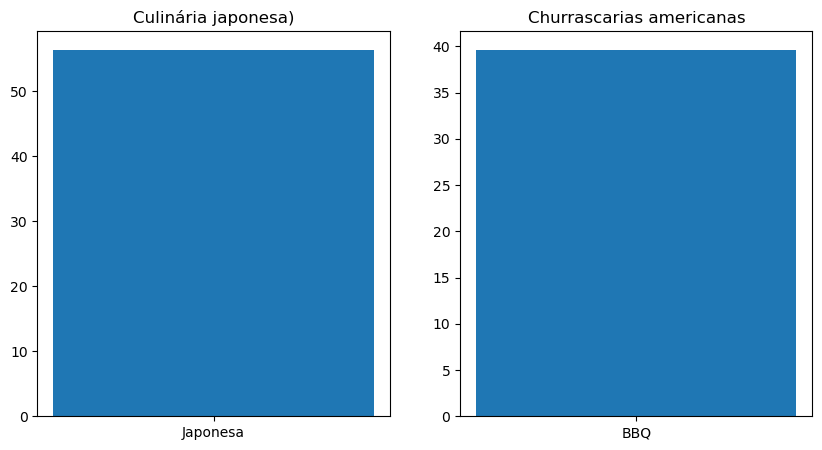

In [101]:
coluna = ['cuisines', 'average_cost_for_two']
# Selecionando apenas os restaurantes de culinária japonesa e churrascarias americanas
japonesa = df1.loc[df1['cuisines'].str.contains('Japanese') & (df1['country'] == 'United States of America'), coluna]
bbq = df1.loc[df1['cuisines'].str.contains('BBQ') & (df1['country'] == 'United States of America'), coluna]

# Calculando as médias do valor médio do prato para duas pessoas
japonesa_media = japonesa['average_cost_for_two'].mean()
bbq_media = bbq['average_cost_for_two'].mean()
# Exibindo as médias em um gráfico

import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10,5))

axs[0].bar(["Japonesa"], [japonesa_media])
axs[0].set_title("Culinária japonesa)")

axs[1].bar(["BBQ"], [bbq_media])
axs[1].set_title("Churrascarias americanas")


plt.show()


## Japanese
## BBQ

# Tipos de Culinária

## 1. Dos restaurantes que possuem o tipo de culinária italiana, qual o nome do restaurante com a maior média de avaliação?

## O Restaurante com a a maior media de avaliação do tipo culinaria Italiana é o Darshan.

In [57]:
italian = (df1.loc[(df1['cuisines'] == 'Italian') & (df1['aggregate_rating'] >= 4.9),
                        ['restaurant_id','restaurant_name','cuisines','aggregate_rating']]
           .sort_values(['aggregate_rating', 'restaurant_id'], ascending=[False, True])
           .head(5))
                    
                   

italian

,restaurant_id,restaurant_name,cuisines,aggregate_rating
4994,10021,Darshan,Italian,4.9
6649,6501298,Cafe Del Sol Classico,Italian,4.9
5809,7100171,Ombra,Italian,4.9
6053,7700796,Celino's,Italian,4.9
336,16587684,Andre's Cucina & Polenta Bar,Italian,4.9


## 2. Dos restaurantes que possuem o tipo de culinária italiana, qual o nome do restaurante com a menor média de avaliação?

## R:O Restaurante com a menor media de avaliação do tipo de culinaria Italiana é a Avenida Paulista.

In [59]:
italian_min = (df1.loc[(df1['cuisines'] == 'Italian') & (df1['aggregate_rating'] >= 0.0),
                        ['restaurant_id','restaurant_name','cuisines','aggregate_rating']]
           .sort_values(['aggregate_rating', 'restaurant_id'], ascending=[True, True])
           .head(5))
                    
                   

italian_min

,restaurant_id,restaurant_name,cuisines,aggregate_rating
138,6600542,Avenida Paulista,Italian,0.0
277,6714499,Ristorantino,Italian,0.0
296,6715707,Più,Italian,0.0
6194,6800666,Le Delicatezze Di Bruno,Italian,0.0
220,7304910,Bene - Sheraton Rio Hotel,Italian,0.0


## 3. Dos restaurantes que possuem o tipo de culinária americana, qual o nome do restaurante com a maior média de avaliação?

## R: Burger & Lobster é o restaurante com a maior media de avaliação do tipo de culinaria americana.	

In [60]:
american_max = (df1.loc[(df1['cuisines'] == 'American') & (df1['aggregate_rating'] >= 4.0),
                        ['restaurant_id','restaurant_name','cuisines','aggregate_rating']]
           .sort_values(['aggregate_rating', 'restaurant_id'], ascending=[False, True])
           .head(5))

american_max

,restaurant_id,restaurant_name,cuisines,aggregate_rating
6122,6102616,Burger & Lobster,American,4.9
6227,6801374,Solita,American,4.9
693,16631515,OEB Breakfast Co.,American,4.9
789,16737455,Portillo's Hot Dogs,American,4.9
1409,16776778,S'MAC,American,4.9


## 4. Dos restaurantes que possuem o tipo de culinária americana, qual o nome do restaurante com a menor média de avaliação?

## R: Alston Bar & Beef é o restaurante com a menor media de avaliação do tipo de culinaria americana.

In [61]:
american_min = (df1.loc[(df1['cuisines'] == 'American') & (df1['aggregate_rating'] >= 0.0),
                        ['restaurant_id','restaurant_name','cuisines','aggregate_rating']]
           .sort_values(['aggregate_rating', 'restaurant_id'], ascending=[True, True])
           .head(5))

american_min

,restaurant_id,restaurant_name,cuisines,aggregate_rating
6220,18756337,Alston Bar & Beef,American,0.0
6623,18445965,Guy Fieri's Kitchen & Bar,American,2.2
228,7303748,Bob's,American,2.6
6675,6502573,Hard Rock Cafe,American,2.8
5849,7100971,Thunderbird Cafe,American,3.2


## 5. Dos restaurantes que possuem o tipo de culinária árabe, qual o nome do restaurante com a maior média de avaliação?

## Mandi@36	é o restaurante com a maior media de avalição

In [62]:
arabian_max = (df1.loc[(df1['cuisines'] == 'Arabian') & (df1['aggregate_rating'] >= 4.0),
                        ['restaurant_id','restaurant_name','cuisines','aggregate_rating']]
           .sort_values(['aggregate_rating', 'restaurant_id'], ascending=[False, True])
           .head(5))

arabian_max

,restaurant_id,restaurant_name,cuisines,aggregate_rating
3646,18535007,Mandi@36,Arabian,4.7
2374,5600517,Madfoon Al Khaimah,Arabian,4.5
6335,6200166,Wok of Fame,Arabian,4.5
3030,18770281,Three Kings,Arabian,4.5
2234,201824,Aroos Damascus,Arabian,4.4


## 6. Dos restaurantes que possuem o tipo de culinária árabe, qual o nome do restaurante com a menor média de avaliação?

## R: Raful é o restaurante com a menor media de avaliação.

In [63]:
arabian_min = (df1.loc[(df1['cuisines'] == 'Arabian') & (df1['aggregate_rating'] >= 0.0),
                        ['restaurant_id','restaurant_name','cuisines','aggregate_rating']]
           .sort_values(['aggregate_rating', 'restaurant_id'], ascending=[True, True])
           .head(5))

arabian_min

,restaurant_id,restaurant_name,cuisines,aggregate_rating
309,6706513,Raful,Arabian,0.0
155,6601535,Empório Árabe,Arabian,2.7
135,6600547,Salim Sou Eu,Arabian,3.1
4766,18698592,V Empire,Arabian,3.2
4732,18698769,Abad Hot Chicken,Arabian,3.2


## 7. Dos restaurantes que possuem o tipo de culinária japonesa, qual o nome do restaurante com a maior média de avaliação?

## Sushi Samba é o restaurante do tipo de culinaria Japonesa com a maior media de avaliação.

In [64]:
japanse_max = (df1.loc[(df1['cuisines'] == 'Japanese') & (df1['aggregate_rating'] >= 4.0),
                        ['restaurant_id','restaurant_name','cuisines','aggregate_rating']]
           .sort_values(['aggregate_rating', 'restaurant_id'], ascending=[False, True])
           .head(5))

japanse_max

,restaurant_id,restaurant_name,cuisines,aggregate_rating
6108,6107336,Sushi Samba,Japanese,4.9
6133,6116563,Chotto Matte,Japanese,4.9
31,6309831,Ramen Yushoken,Japanese,4.9
16,6316125,Mendokoro Ramenba,Japanese,4.9
20,6318506,Ooma,Japanese,4.9


## 8. Dos restaurantes que possuem o tipo de culinária japonesa, qual o nome do restaurante com a menor média de avaliação?

## Banzai Sushi é o restaurante com a menor media de avaliação do tipo de culinaria Japonesa.

In [66]:
japanse_min = (df1.loc[(df1['cuisines'] == 'Japanese') & (df1['aggregate_rating'] >= 0.0),
                        ['restaurant_id','restaurant_name','cuisines','aggregate_rating']]
           .sort_values(['aggregate_rating', 'restaurant_id'], ascending=[True, True])
           .head(5))

japanse_min

,restaurant_id,restaurant_name,cuisines,aggregate_rating
114,6600203,Banzai Sushi,Japanese,0.0
167,7300930,Orienthai,Japanese,2.4
168,7304077,Hachiko,Japanese,2.5
103,6600314,Haná,Japanese,2.7
107,6600379,Sushi Loko,Japanese,2.9


## 9. Dos restaurantes que possuem o tipo de culinária caseira, qual o nome do restaurante com a maior média de avaliação?

## Kanaat Lokantası é o restaurante com a maior media de avaliação do tipo de culinaria caseira.

In [67]:
home_made_max = (df1.loc[(df1['cuisines'] == 'Home-made') & (df1['aggregate_rating'] >= 4.0),
                        ['restaurant_id','restaurant_name','cuisines','aggregate_rating']]
           .sort_values(['aggregate_rating', 'restaurant_id'], ascending=[False, True])
           .head(5))

home_made_max

,restaurant_id,restaurant_name,cuisines,aggregate_rating
6925,5914190,Kanaat Lokantası,Home-made,4.0


## 10. Dos restaurantes que possuem o tipo de culinária caseira, qual o nome do restaurante com a menor média de avaliação?

## GurMekan Restaurant é o restaurante com a menor media de avaliação do tipo de culinaria caseira.

In [68]:
home_made_min = (df1.loc[(df1['cuisines'] == 'Home-made') & (df1['aggregate_rating'] >= 0.0),
                        ['restaurant_id','restaurant_name','cuisines','aggregate_rating']]
           .sort_values(['aggregate_rating', 'restaurant_id'], ascending=[True, True])
           .head(5))

home_made_min

,restaurant_id,restaurant_name,cuisines,aggregate_rating
6779,6007184,GurMekan Restaurant,Home-made,3.7
6925,5914190,Kanaat Lokantası,Home-made,4.0


## 11. Qual o tipo de culinária que possui o maior valor médio de um prato para duas pessoas?
## o Tipo de culinaria com maior valor medio de prato para duas pessoas é o New Mexican	

In [69]:
colunas = ['restaurant_id', 'cuisines', 'price_in_dollar']
df2 = df1.loc[:, colunas]
df3 = df2.groupby('cuisines').agg({'price_in_dollar': 'mean', 'restaurant_id': 'min'})
df3 = df3.sort_values(['price_in_dollar', 'restaurant_id'], ascending=[False, True]).head(5).reset_index()
df3.round(decimals=3)

,cuisines,price_in_dollar,restaurant_id
0,New Mexican,180.000,16739097
1,Modern Australian,114.706,16587253
2,Argentine,106.787,6601569
3,Pacific Northwest,106.364,16717368
4,California,102.500,16843658


## 12. Qual o tipo de culinária que possui a maior nota média?

## R: Others é o tipo de culinaria com a maior nota media.

In [70]:
colunas = ['cuisines', 'aggregate_rating']
df2 = df1.loc[:, colunas]
df3 = df2.groupby('cuisines').agg({'aggregate_rating': 'mean'})
df3 = df3.sort_values('aggregate_rating', ascending=False)
df3.loc[df3['aggregate_rating'] >= 4.0].head(5).reset_index()

,cuisines,aggregate_rating
0,Others,4.90
1,Ramen,4.80
2,Egyptian,4.80
3,Ottoman,4.80
4,Sunda,4.75


## 13. Qual o tipo de culinária que possui mais restaurantes que aceitam pedidos online e fazem entregas?

## North Indian	é o tipo de culinaria que tem mais restaurantes que aceitam pedidos online 

In [71]:
colunas = ['restaurant_id', 'cuisines', 'has_online_delivery', 'is_delivering_now']
df2 = df1.loc[(df1['has_online_delivery'] == 1) & (df1['is_delivering_now'] == 1), colunas]
df3 = df2.groupby(['cuisines', 'has_online_delivery', 'is_delivering_now']).agg({'restaurant_id': 'count'})
df3.sort_values('restaurant_id', ascending=False).head(5).reset_index()


,cuisines,has_online_delivery,is_delivering_now,restaurant_id
0,North Indian,1,1,317
1,Cafe,1,1,131
2,South Indian,1,1,79
3,Burger,1,1,76
4,Fast Food,1,1,72
